In [77]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
# Show plots in the notebook
%matplotlib inline

# Import SciPy
import scipy

# Print the location of the file from where `SciPy` is loaded
print(scipy.__file__)
from scipy import constants
from numpy import exp
from scipy import integrate

D:\app\anaconda\envs\ese5023\Lib\site-packages\scipy\__init__.py


In [78]:
# Mathematical constants
scipy.constants.R

8.314462618

In [79]:
# Physical constants
scipy.constants.pi

3.141592653589793

In [80]:
scipy.constants.physical_constants['atomic unit of mass']

(9.1093837015e-31, 'kg', 2.8e-40)

In [81]:
scipy.constants.micro


1e-06

In [82]:
scipy.constants.long_ton


1016.0469088

In [83]:
scipy.constants.mph

0.44703999999999994

In [84]:
f = lambda x:exp(x**x+x**2+exp(-x**x-x**2))
result = integrate.quad(f,0,1)
result

(4.479669889309738, 1.6940226998940489e-10)

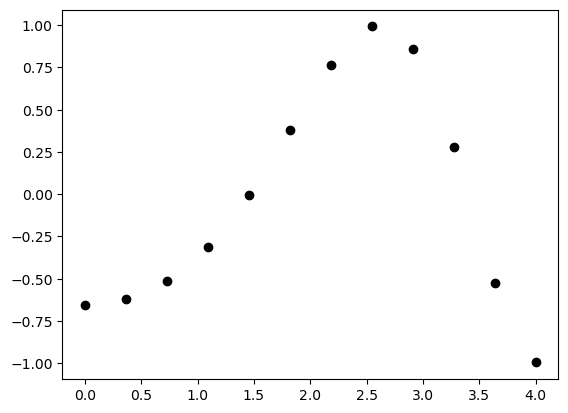

In [85]:
# Make up some data points
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)

# Plot data
plt.plot(x, y,'ko')

0.5230886697954874 0.5710923082609513


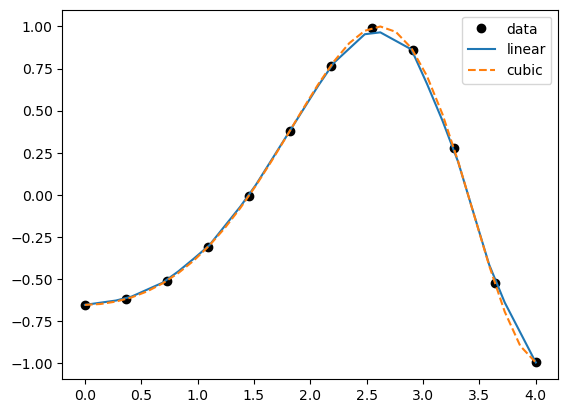

In [86]:
from scipy.interpolate import interp1d

# Using interp1d function
f1 = interp1d(x, y, kind = 'linear')
f2 = interp1d(x, y, kind = 'cubic')

# Now make x finer
xnew = np.linspace(0, 4, 30)

# Plot interpolated values
plt.plot(x, y, 'ko', xnew, f1(xnew), '-', xnew, f2(xnew), '--')

# Add legend
plt.legend(['data', 'linear', 'cubic'], loc = 'best')

# Show data at a specific location
print(f1(3.12), f2(3.12))

array(0.20580503)

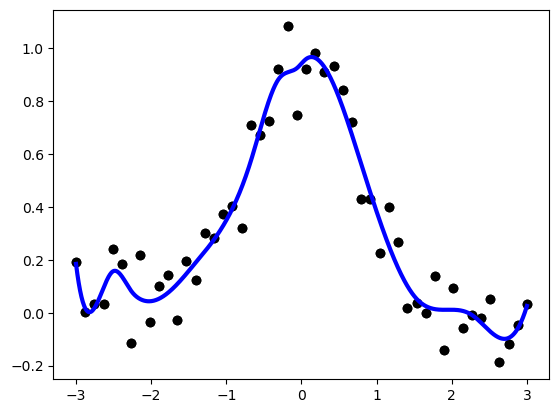

In [87]:
# Make up some data points
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)

# Plot data
plt.plot(x, y, 'ko')
#Suppose we want to find the value of when , you can use as:yx=1.23UnivariateSpline()

from scipy.interpolate import UnivariateSpline

# Using UnivariateSpline function
spl = UnivariateSpline(x, y, k=3.5)
spl.set_smoothing_factor(0.4)

# Now make x finer
xnew = np.linspace(-3, 3, 1000)

# Plot interpolated values
plt.plot(x, y, 'ko')
plt.plot(xnew, spl(xnew), 'b', lw = 3)

# Show data at a specific location
spl(1.23)

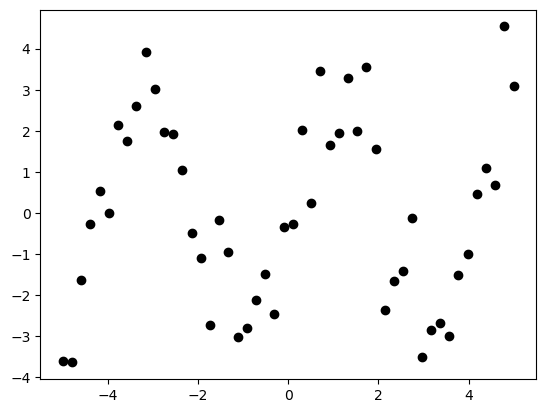

In [88]:
# Make up some data points
x = np.linspace(-5, 5, num=50)
y = 2.9 * np.sin(1.5 * x) + np.random.normal(size=50)

# Plot data
plt.plot(x, y, 'ko')

In [89]:
# Define the function to fit
def guess_func(x, a, b):
    return a * np.sin(b * x)

[2.88769254 1.50649401]


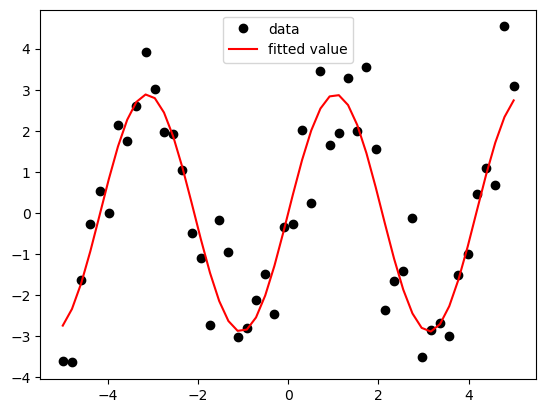

In [90]:
from scipy import optimize

# Fit parameters
params, _ = optimize.curve_fit(guess_func, x, y)
print(params)

# Plot fitted data
plt.plot(x, y, 'ko', x, params[0]*np.sin(params[1] * x), 'r-')

# Add legend
plt.legend(['data', 'fitted value'], loc = 'best')

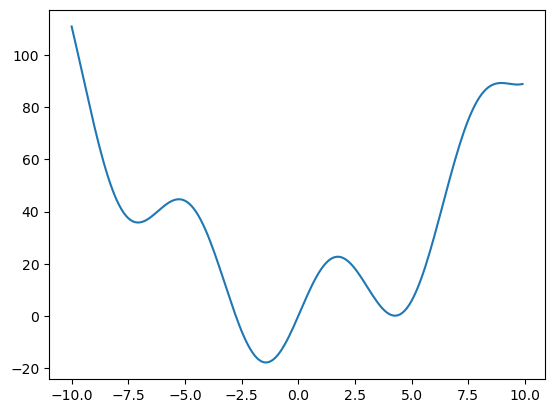

In [91]:
# Define a function
def g(x):
    return x**2 + 20*np.sin(x)

# Set the range
x = np.arange(-10, 10, 0.1)

# Plot the function
plt.plot(x, g(x))

In [92]:
# Using minimize() to search for minimums
# 多个中选取最小，还有约束方法
result = optimize.minimize(g, x0=5)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.15825752683179672
        x: [ 4.271e+00]
      nit: 5
      jac: [-2.384e-07]
 hess_inv: [[ 4.977e-02]]
     nfev: 12
     njev: 6

In [93]:
# Using root() to find the roots
root = optimize.root(g, x0=-2) 
root

 message: The solution converged.
 success: True
  status: 1
     fun: [-4.441e-15]
       x: [-2.753e+00]
    nfev: 9
    fjac: [[-1.000e+00]]
       r: [ 2.401e+01]
     qtf: [ 3.325e-11]

In [94]:
# Generate a sample
sample = np.random.normal(size=1000)

from scipy import stats

# Fit a normal distribution
stats.norm.fit(sample)

(0.015295151346122488, 1.0268251226817484)

In [95]:
# Sample 1
sample1 = np.random.normal(0, 1, size=20)

# Sample 2
sample2 = np.random.normal(1, 1, size=15)

# Independent t-test
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=-2.3590068915781224, pvalue=0.024395991549492926, df=33.0)

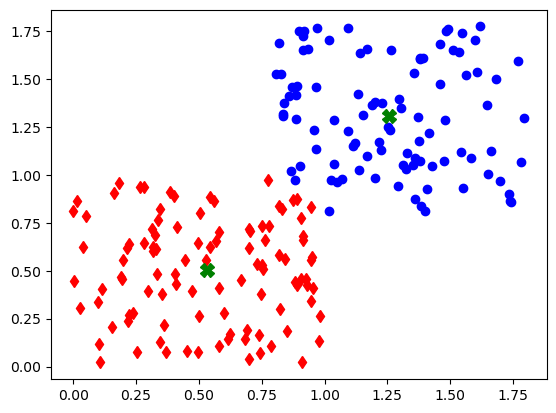

In [96]:
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# Data generation, 200 rows, 2 cols
data = vstack((rand(100,2) + array([.8,.8]), rand(100,2)))

# Show data
plt.plot(data[:,0],data[:,1],'k+')

# Computing K-Means with K = 2 (2 clusters)
centroids, mean_dist = kmeans(data,2)

# Assign each sample to a cluster
clusters, dist = vq(data,centroids)

# Plot clusters
plt.plot(data[clusters==0][:,0], data[clusters==0][:,1],'bo')
plt.plot(data[clusters==1][:,0], data[clusters==1][:,1],'rd')

# Plot cluster centroids
plt.plot(centroids[:,0],centroids[:,1],'gX',markersize=10)

# Plot raw data
#plt.plot(data[:,0],data[:,1],'w+')

In [97]:
max = [19.8, 20.2, 22.7, 26.3, 29.5, 31.1, 32.3, 32.3, 31.3, 29.2, 25.4, 21.5]
min = [12.5, 13.8, 16.5, 20.3, 23.6, 25.6, 26.3, 26.1, 25.0, 22.5, 18.2, 13.8]
mon = [1,2,3,4,5,6,7,8,9,10,11,12]

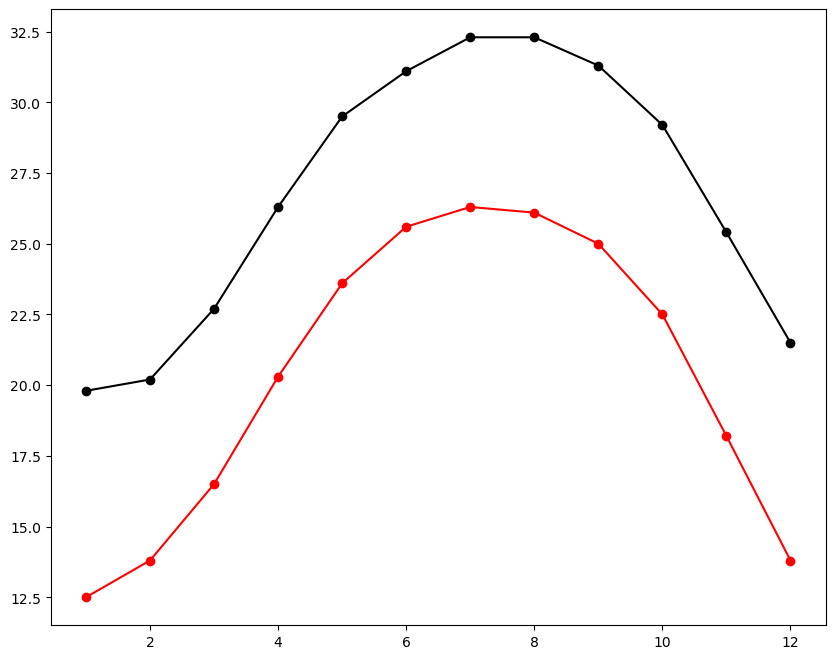

In [98]:
plt.figure(figsize = (10,8))
plt.plot(mon,max,'ko-')
plt.plot(mon,min,'ro-')

In [99]:
# Define the function to fit
pi = scipy.constants.pi
def fit_fun(x, a, b, c):
    return a * np.sin( pi/6* x + b) +c

[-6.98945681  0.92445088 20.35      ]
[5.99999998]


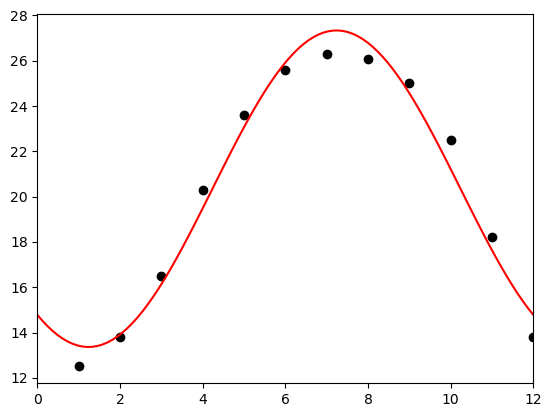

In [100]:
params, _= optimize.curve_fit(fit_fun, mon, min)
print(params)
x=np.linspace(0,12,100)
# Plot fitted data
plt.plot(mon, min, 'ko',x, params[0]*np.sin(pi/6 * x+params[1])+params[2], 'r-')
plt.xlim(0,12)

#find x corresponding to min
a,b,c = params
def g(x):
    return a*np.sin(pi/6*x+b)+c

result_min= optimize.minimize(g,x0=4)

a,b,c = params
def g(x):
    return -(a*np.sin(pi/6*x+b)+c)

result_max= optimize.minimize(g,x0=4)

print(result_max.x-result_min.x)

[-6.98945681  0.92445088 20.35      ]


(0.0, 12.0)

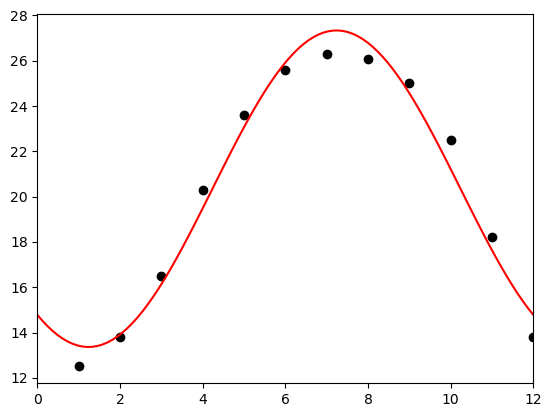

In [101]:
# Fit parameters
from scipy import optimize
params, _= optimize.curve_fit(fit_fun, mon, min)
print(params)
# Plot fitted data
plt.plot(mon, min, 'ko',x, params[0]*np.sin(pi/6 * x+params[1])+params[2], 'r')
plt.xlim(0,12)

In [102]:
# lab01
a = np.array([[1,3,5],[2,4,1],[2,3,8]])
b =np.array([10,8,3])
import numpy as np
from scipy import linalg
x =linalg.solve(a,b)
x

array([-7.26086957,  5.60869565,  0.08695652])

In [103]:
# lab02
from numpy import linalg as LA
eigenvalue, eigenvector = LA.eig(np.array([[1,2,3],[4,5,6],[7,8,9]]))
print(eigenvalue)
print(eigenvector)

[ 1.61168440e+01 -1.11684397e+00 -3.38433605e-16]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [104]:
# lab 03
import numpy as np
def pend(y, t,k):
    dydt = k*y
    return dydt
y0=1
t=np.linspace(0,10,100)
from scipy.integrate import odeint

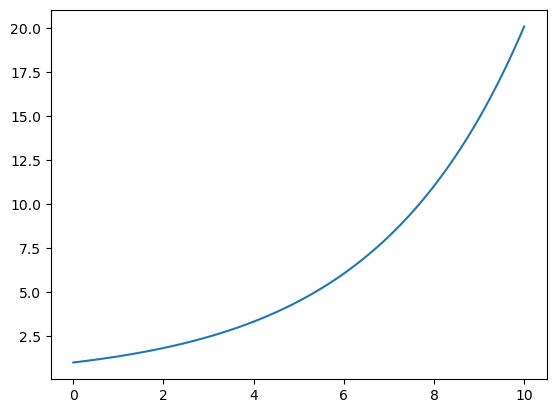

In [105]:
from scipy.integrate import odeint
result3 = odeint(pend,y0,t,args=(0.3,))
result3
plt.plot(t,result3)

In [106]:
a = np.random.randint(1,10,size=20)
stats.describe(a)

DescribeResult(nobs=20, minmax=(1, 9), mean=5.1, variance=4.8315789473684205, skewness=-0.4045253576080914, kurtosis=-0.5263217850684212)

In [107]:
b = np.random.normal(0,5,size=(100))


In [108]:
from scipy import stats
res = stats.normaltest(b)
res 

NormaltestResult(statistic=4.091205988368161, pvalue=0.12930219799199938)

In [109]:
import numpy as np
from scipy import stats
x, y = [0.18,1.05,0.5,0.61,1.58,1.10,1.36,0.77], [10, 50, 20, 30, 80, 60, 70,40]
res = stats.pearsonr(x, y)
res

PearsonRResult(statistic=0.9933084233167603, pvalue=7.453208045858082e-07)

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
slope, intercept, r, p, se = stats.linregress(x, y)
slope


52.289953565861424